In [42]:
%pylab inline
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [43]:
#question 0
x0=[]               #liste conditions initiales
for i in range(10):
    x0.append(uniform(0.25,4,2))

print(x0)

[array([ 3.43181364,  1.9980528 ]), array([ 2.45820849,  0.92664907]), array([ 0.98698916,  2.96080251]), array([ 1.93790567,  3.06812894]), array([ 1.95597991,  2.74527455]), array([ 0.5008135 ,  1.99674899]), array([ 2.60633456,  2.42335779]), array([ 0.9324608 ,  2.48600161]), array([ 2.27475228,  0.83955215]), array([ 3.20203544,  3.34248874])]


In [4]:
#question 1
# on définit la fonction f. En entrée, ce sont des vecteurs de dimension 2
def F(x,t):
    return(array([x[0]*(1-x[1]), -2*x[1]*(1-x[0])]))

#intervalle
t = linspace(0,10,40961)  

#conditions initiales: x0

#résolution
Sol=[]

for i in range(len(x0)):
    Sol.append(odeint(F,x0[i],t))

Text(0.5,1,'portrait de phase des solutions')

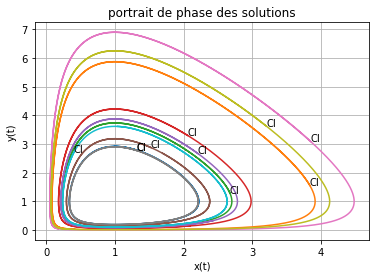

In [5]:
#question 2a)

x=[]
y=[]
for i in range(len(Sol)):
    x.append(Sol[i][:,0])     #X[solution de la ième condi initiale][on prend les x]
    y.append(Sol[i][:,1])     #X[solution de la ième condi initiale][on prend les y]
    
plt.grid(True)
for i in range(len(x)):
    plot(x[i],y[i])         #marqueur problème ca grossit la courbe
    text(x0[i][0],x0[i][1], "CI")

xlabel("x(t)")
ylabel("y(t)")
title("portrait de phase des solutions")

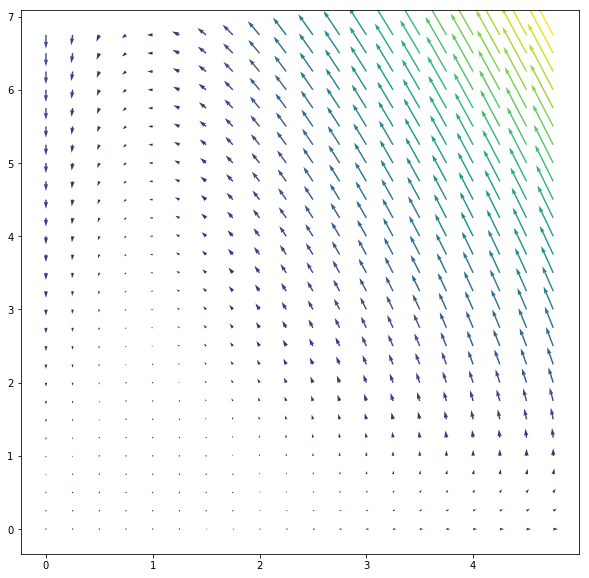

In [6]:
#question 2b)

#création de points
x=arange(0,5,0.25)
y=arange(0,7,0.25)


# meshgrid, produit une matrices de coordonnées à partir de deux vecteurs. 
X,Y = np.meshgrid(x,y) # grille bidimensionnelle


#définition du champ vectoriel
U = X*(1-Y)
V = -2*Y*(1-X)

# calcul du module du vecteur
C = ( U**2. + V**2. )**.5 
# taille de la figure : 10 x 10 pouces
plt.figure( figsize=(10,10) ) 

#trace le graphyque du champ ve
plt.quiver( X, Y, U, V, C)

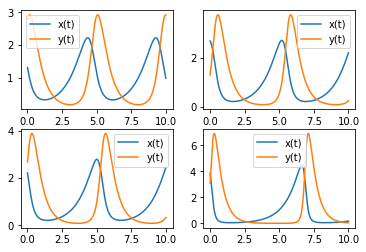

In [7]:
#question 3
subplot(221)
[p1,p2]=plot(t,Sol[0])
legend([p1,p2],["x(t)", "y(t)"])

subplot(222)
[p1,p2]=plot(t,Sol[2])
legend([p1,p2],["x(t)", "y(t)"])

subplot(223)
[p1,p2]=plot(t,Sol[4])
legend([p1,p2],["x(t)", "y(t)"])

subplot(224)
[p1,p2]=plot(t,Sol[6])
legend([p1,p2],["x(t)", "y(t)"])

In [8]:
#question 4

#euler explicite
def euler_explicite(T,h,CI):
    N = T/h
    t,x=linspace(0,T,N+1),[]
    x.append(CI)
    for n in range(int(N)):
        x.append(x[n]+h*F(x[n],t[n]))
    return t,x


#Euler implicite avec fsolve
def euler_implicite(T,h,CI):
    N = T/h
    t,x=linspace(0,T,N+1),[]
    x.append(CI)
    for n in range(int(N)):
        s = fsolve(lambda u: u - x[n] - h*F(u,t[n+1]), [1,1])
        x.append(s)
    return(t,x)


#On aurait pu utiliser Newton pour Euler Implicite 

def dF(x,t):
    return(array([[(1-x[1]), -x[0]],[2*x[1], -2*(1-x[0])]]))


def Newton(f,df,x0,eps):
    x = x0
    while norm(f(x)) > eps:
        x = x - np.linalg.inv(df(x)).dot(f(x))
    return x

def euler_implicite_newton(T,h,CI,eps):
    N = T/h
    t,x=linspace(0,T,N+1),[]
    x.append(CI)
    I = np.eye(2,2)
    for n in range(int(N)):
        s = Newton(lambda u: u - x[n] - h*F(u,t[n+1]), lambda u: I - h*dF(u,t[n+1]), CI, eps)
        x.append(s)
    return(t,x)


#Runge Kutta
def runge_kutta(T,h,x0):
    if T/h!=int(T/h):
        return("h doit diviser T")
    t,x=linspace(0,T,int(T/h+1)), [x0]
    for i in range(int(T/h)):
        k1=F(x[i],t[i])
        k2=F(x[i]+h/2*k1,t[i]+h/2)
        k3=F(x[i]+h/2*k2,t[i]+h/2)
        k4=F(x[i]+h*k3,t[i]+h)
        x.append(x[i]+h/6*(k1+2*k2+2*k3+k4))
    return(t,x)


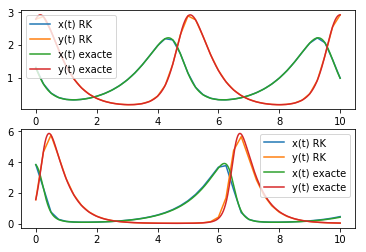

In [9]:
#question 5 pour Runge Kutta
#on prend comme condition initiale x0[0] et x0[1]
t0, X0=runge_kutta(10,0.25,x0[0])
t1, X1=runge_kutta(10,0.25,x0[1])

subplot(211)
[p1,p2]=plot(t0,X0)
[p3,p4]=plot(t,Sol[0])
legend([p1,p2,p3,p4],["x(t) RK","y(t) RK","x(t) exacte","y(t) exacte"])

subplot(212)
[p1,p2]=plot(t1,X1)
[p3,p4]=plot(t,Sol[1])
legend([p1,p2,p3,p4],["x(t) RK","y(t) RK","x(t) exacte","y(t) exacte"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()


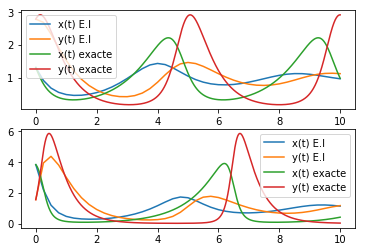

In [10]:
#Question 5 piur Euler implicite

#on prend comme condition initiale x0[0] et x0[1]
t0, X0=euler_implicite(10,0.25,x0[0])
t1, X1=euler_implicite(10,0.25,x0[1])

subplot(211)
[p1,p2]=plot(t0,X0)
[p3,p4]=plot(t,Sol[0])
legend([p1,p2,p3,p4],["x(t) E.I","y(t) E.I","x(t) exacte","y(t) exacte"])

subplot(212)
[p1,p2]=plot(t1,X1)
[p3,p4]=plot(t,Sol[1])
legend([p1,p2,p3,p4],["x(t) E.I","y(t) E.I","x(t) exacte","y(t) exacte"])

#on note que euler implicite approxime la solution réelle seulement au début

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.


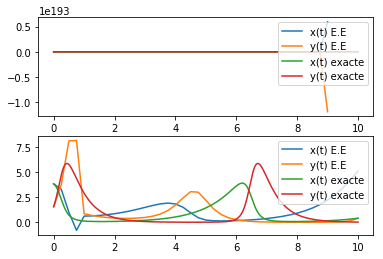

In [12]:
#question 5 pour Euler explicite

#on prend comme condition initiale x0[0] et x0[1]
t0, X0=euler_explicite(10,0.25,x0[0])
t1, X1=euler_explicite(10,0.25,x0[1])

subplot(211)
[p1,p2]=plot(t0,X0)
[p3,p4]=plot(t,Sol[0])
legend([p1,p2,p3,p4],["x(t) E.E","y(t) E.E","x(t) exacte","y(t) exacte"])

subplot(212)
[p1,p2]=plot(t1,X1)
[p3,p4]=plot(t,Sol[1])
legend([p1,p2,p3,p4],["x(t) E.E","y(t) E.E","x(t) exacte","y(t) exacte"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


L'ordre de convergence effectif vaut 1.07021629114


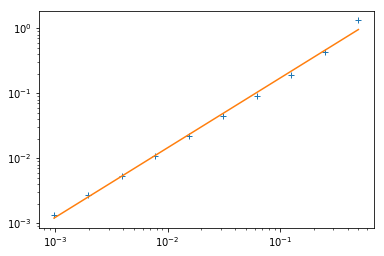

In [14]:
#Question 6
#Euler explicite
#On se place avec les CI x0[0]


Solex0=Sol[0][:8192]

h, erreur = [], []
for i in range(10):
    h.append(1/(2**(i+1)))
    t, x = euler_explicite(2,h[i],x0[0])
    diffi = []
    for k in range(int(2/h[i])):
        diffi.append(norm(x[k] - Solex0[k*2**(12-i-1)]))
    erreur_i = max(diffi)
    erreur.append(erreur_i)

slope=polyfit(log(h),log(erreur),1)
loglog(h,erreur,'+',h,exp(slope[1])*(h**(slope[0])))
print("L'ordre de convergence effectif vaut",slope[0]) #Proche de la valeur théorique



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


L'ordre de convergence effectif vaut 1.25803418892


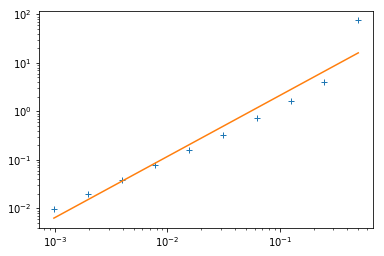

In [15]:
#Question 6
#Euler explicite
#On se place avec les CI x0[1]


Solex1=Sol[1][:8192]

h, erreur = [], []
for i in range(10):
    h.append(1/(2**(i+1)))
    t, x = euler_explicite(2,h[i],x0[1])
    diffi = []
    for k in range(int(2/h[i])):
        diffi.append(norm(x[k] - Solex1[k*2**(12-i-1)]))
    erreur_i = max(diffi)
    erreur.append(erreur_i)

slope=polyfit(log(h),log(erreur),1)
loglog(h,erreur,'+',h,exp(slope[1])*(h**(slope[0])))
print("L'ordre de convergence effectif vaut",slope[0]) #Proche de la valeur théorique



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()


L'ordre de convergence effectif vaut 0.957180313035


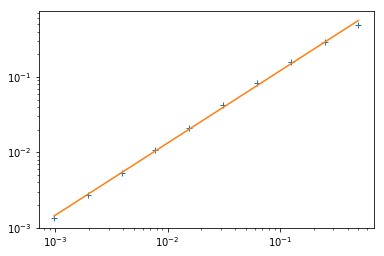

In [16]:
#question 6
#Euler implicite
#on se place avec la CI x0[0]

h, erreur = [], []
for i in range(10):
    h.append(1/(2**(i+1)))
    t,x = euler_implicite(2,h[i],x0[0])
    diffi = []
    for k in range(int(2/h[i])):
        diffi.append(norm(x[k] - Solex0[k*2**(12-i-1)]))
    erreur_i = max(diffi)
    erreur.append(erreur_i)

slope=polyfit(log(h),log(erreur),1)
loglog(h,erreur,'+',h,exp(slope[1])*(h**(slope[0])))
print("L'ordre de convergence effectif vaut",slope[0]) #Proche de la valeur théorique

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()


L'ordre de convergence effectif vaut 0.886448699218


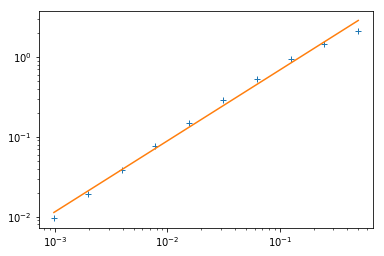

In [17]:
#question 6
#Euler implicite
#on se place avec la CI x0[1]

h, erreur = [], []
for i in range(10):
    h.append(1/(2**(i+1)))
    t,x = euler_implicite(2,h[i],x0[1])
    diffi = []
    for k in range(int(2/h[i])):
        diffi.append(norm(x[k] - Solex1[k*2**(12-i-1)]))
    erreur_i = max(diffi)
    erreur.append(erreur_i)

slope=polyfit(log(h),log(erreur),1)
loglog(h,erreur,'+',h,exp(slope[1])*(h**(slope[0])))
print("L'ordre de convergence effectif vaut",slope[0]) #Proche de la valeur théorique

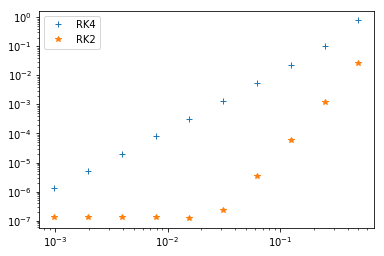

In [19]:
#question 6
#Runge Kutta
#on se place avec la CI x0[0]
h,erreur = [],[]
for i in range(10):
    h.append(1/(2**(i+1)))
    t,x = runge_kutta(2,h[i],x0[0])
    test_i = []
    for k in range(int(2/h[i])):
        test_i.append(norm(x[k] - Solex0[k*2**(12-i-1)]))
    erreur_i = max(test_i)
    erreur.append(erreur_i)
    
#on compare nos résultats avec ceux de RK2
#on définit RK2
def RK2(T,h,CI):
    if T/h!=int(T/h):
        return("h doit diviser T")
    t,x=linspace(0,T,int(T/h+1)), [CI]
    for i in range(int(T/h)):
        k1=F(x[i],t[i])
        k2=F(x[i]+h*k1,t[i]+h)
        x.append(x[i]+h/2*(k1+k2))
    return(t,x)

#on crée nos résultats
t1,x1= RK2(2,0.5,x0[0])

#on va créer nos erreurs pour RK2
h,erreur2 = [],[]
for i in range(10):
    h.append(1/(2**(i+1)))
    t,x = RK2(2,h[i],x0[0])
    test = []
    for k in range(int(2/h[i])):
        test.append(norm(x[k] - Solex0[k*2**(12-i-1)]))
    erreur_i2 = max(test)
    erreur2.append(erreur_i2)
    
loglog(h,erreur2,'+', label='RK4')
loglog(h,erreur, '*', label='RK2')
legend()

#Les erreurs s'écrasent pour RK4 (voire explication sur la rapport)

L'ordre de convergence effectif vaut 1.87025755088


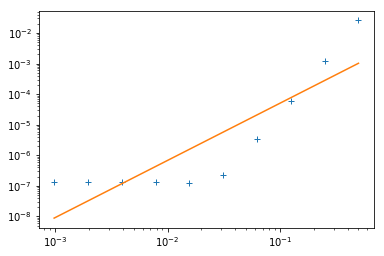

In [20]:
slope=polyfit(log(h),log(erreur),1)
loglog(h,erreur,'+',h,exp(slope[1])*(h**(slope[0])))
print("L'ordre de convergence effectif vaut",slope[0]) #Pas proche de la valeur théorique, voire explication dans rapport

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


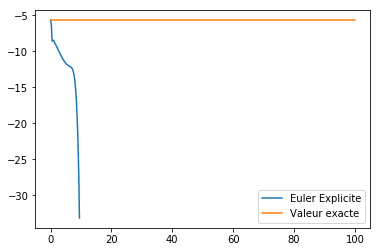

In [45]:
#question 7(a)
def C(x):
    return(2*log(x[0]) - 2*x[0] + log(x[1]) - x[1])

t1, x1 = euler_explicite(100,0.25,x0[0]) #pour t1[42] = 10.5 on obtient x1[42] avec x ou y négatif
t2, x2 = euler_implicite(100,0.25,x0[0])
t3, x3 = runge_kutta(100,0.25,x0[0])

t  = linspace(0,100,400)
x  = odeint(F, x0[0], t)
C0  = [C(x[i]) for i in range(len(x))]
C1 = [C(x1[i]) for i in range(len(x1))]
C2 = [C(x2[i]) for i in range(len(x2))]
C3 = [C(x3[i]) for i in range(len(x3))]
plot(t1,C1, label='Euler Explicite')
plot(t,C0, label='Valeur exacte')
legend()

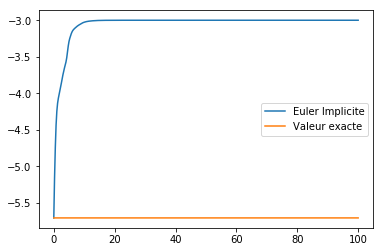

In [46]:
plot(t2,C2, label='Euler Implicite')
plot(t,C0, label='Valeur exacte')
legend()

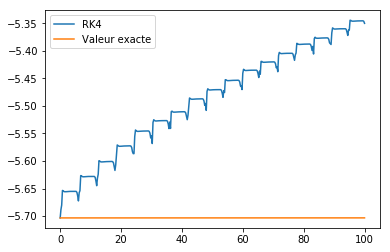

In [47]:
plot(t3,C3, label='RK4')
plot(t,C0, label='Valeur exacte')
legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


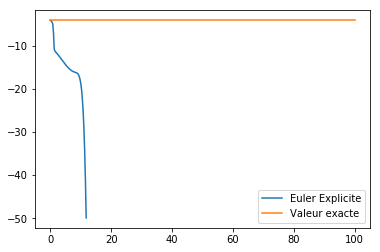

In [48]:
#question 7(a)
def C(x):
    return(2*log(x[0]) - 2*x[0] + log(x[1]) - x[1])

t1, x1 = euler_explicite(100,0.25,x0[1]) #pour t1[42] = 10.5 on obtient x1[42] avec x ou y négatif
t2, x2 = euler_implicite(100,0.25,x0[1])
t3, x3 = runge_kutta(100,0.25,x0[1])

t  = linspace(0,100,400)
x  = odeint(F, x0[1], t)
C0  = [C(x[i]) for i in range(len(x))]
C1 = [C(x1[i]) for i in range(len(x1))]
C2 = [C(x2[i]) for i in range(len(x2))]
C3 = [C(x3[i]) for i in range(len(x3))]
plot(t1,C1, label='Euler Explicite')
plot(t,C0, label='Valeur exacte')
legend()

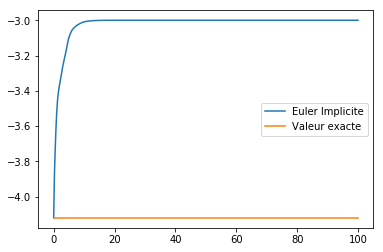

In [49]:
plot(t2,C2, label='Euler Implicite')
plot(t,C0, label='Valeur exacte')
legend()

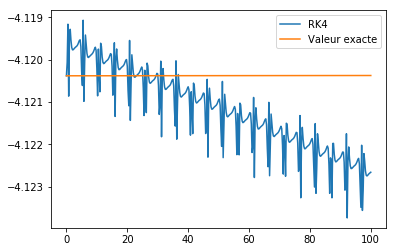

In [50]:
plot(t3,C3, label='RK4')
plot(t,C0, label='Valeur exacte')
legend()

Text(0.5, 1.0, 'portrait de phase des RK')

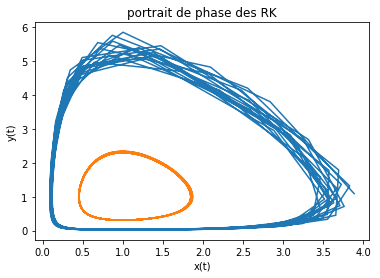

In [23]:
#question 7(b)
#portrait de phase de Runge Kutta
t, x = runge_kutta(100,0.25,x0[0])
t, z = runge_kutta(100,0.25,x0[1])
aa1=[]
aa2=[]
bb1=[]
bb2=[]
for i in range(len(x)):
    aa1.append(x[i][0])     #X[solution de la ième condi initiale][on prend les x]
    aa2.append(x[i][1])
    bb1.append(z[i][0])
    bb2.append(z[i][1])


p1=plot(aa1,aa2)
p2=plot(bb1,bb2)
xlabel("x(t)")
ylabel("y(t)")
title("portrait de phase des RK")


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()


Text(0.5, 1.0, 'portrait de phase de euler explicite')

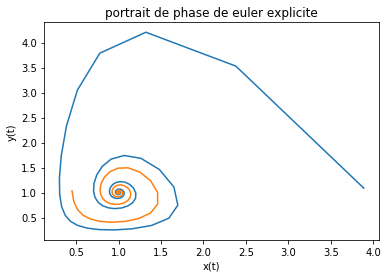

In [24]:
#question 7(b)
#portrait de phase de Euler Implicite
t, x = euler_implicite(100,0.25,x0[0])
t, z = euler_implicite(100,0.25,x0[1])
aa1=[]
aa2=[]
bb1=[]
bb2=[]
for i in range(len(x)):
    aa1.append(x[i][0])     #X[solution de la ième condi initiale][on prend les x]
    aa2.append(x[i][1])
    bb1.append(z[i][0])
    bb2.append(z[i][1])


p1=plot(aa1,aa2)
p2=plot(bb1,bb2)
xlabel("x(t)")
ylabel("y(t)")
title("portrait de phase de euler explicite")


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.


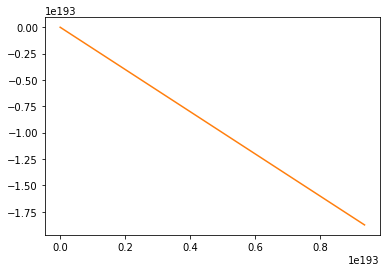

In [25]:
#question 7(b)
#portrait de phase de Euler Explicite
t, x = euler_explicite(100,0.25,x0[0])
t, z = euler_explicite(100,0.25,x0[1])
aa1=[]
aa2=[]
bb1=[]
bb2=[]
for i in range(len(x)):
    aa1.append(x[i][0])     #X[solution de la ième condi initiale][on prend les x]
    aa2.append(x[i][1])
    bb1.append(z[i][0])
    bb2.append(z[i][1])


p1=plot(bb1, bb2)
p2=plot(aa1, aa2)


In [69]:
#PARTIE IV
#création de notre modèle
def F1(x):
    return(x[0]*(1-x[1]))

def F2(x):
    return(-2*x[1]*(1-x[0]))


def SCH(T,h,CI):
    N = T/h
    t,sol=linspace(0,T,N+1),[CI]
    x=CI[0]
    y=CI[1]
    for n in range(int(N)):
        if 1+h*y==0:
            return('on a 1+h*yn=0')
        else:
            a=x+h/(1+h*y)*F1(sol[n])    #a=xn+1
            b=y+h*F2(array([a,y]))               #b=yn+1
            sol.append(array([a,b]))
            x=a
            y=b
    return t,sol
    

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


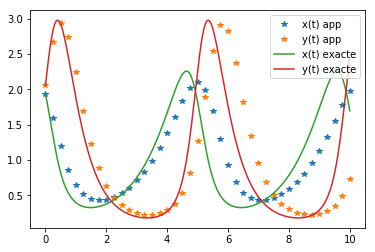

In [70]:
#utiliser le même nombre de pas pour la solution exacte?

#Question 3

#solution approchée pour x0[0]
tapp,xapp=SCH(10,0.25, x0[0])

#solution exacte
t = linspace(0,10,40961)

#plot
[p1,p2]=plot(tapp,xapp, '*')
[p3,p4]=plot(t,Sol[0])
legend([p1,p2,p3,p4],["x(t) app","y(t) app","x(t) exacte","y(t) exacte"])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


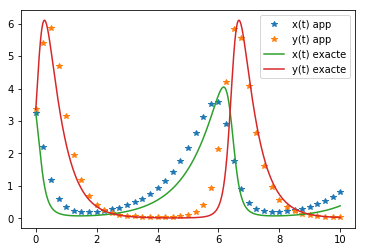

In [71]:
#solution approchée pour x0[1]
tapp,xapp=SCH(10,0.25, x0[1])

#solution exacte
t = linspace(0,10,40961)

#plot
[p1,p2]=plot(tapp,xapp, '*')
[p3,p4]=plot(t,Sol[1])
legend([p1,p2,p3,p4],["x(t) app","y(t) app","x(t) exacte","y(t) exacte"])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


L'ordre de convergence effectif vaut 0.9641643240812532


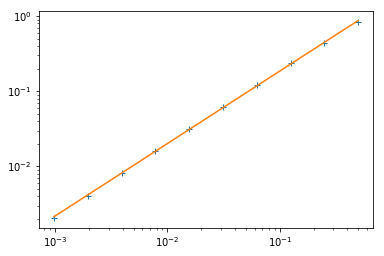

In [72]:
#Question 4, 
#pour x0[0]
Solex1=Sol[0][:8192]

h, erreur = [], []
for i in range(10):
    h.append(1/(2**(i+1)))
    t, x = SCH(2,h[i],x0[0])
    diff = []
    for k in range(int(2/h[i])):
        diff.append(norm(x[k] - Solex1[k*2**(12-i-1)]))
    erreur_i = max(diff)
    erreur.append(erreur_i)

slope=polyfit(log(h),log(erreur),1)
loglog(h,erreur,'+',h,exp(slope[1])*(h**(slope[0])))
print("L'ordre de convergence effectif vaut",slope[0])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


L'ordre de convergence effectif vaut 0.8759359592337642


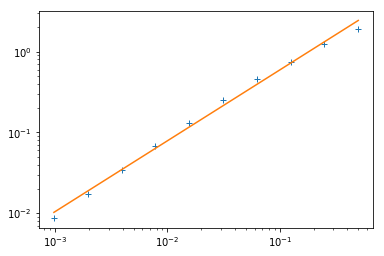

In [73]:
#Question 4, 
#pour x0[0]
Solex1=Sol[1][:8192]

h, erreur = [], []
for i in range(10):
    h.append(1/(2**(i+1)))
    t, x = SCH(2,h[i],x0[1])
    diff = []
    for k in range(int(2/h[i])):
        diff.append(norm(x[k] - Solex1[k*2**(12-i-1)]))
    erreur_i = max(diff)
    erreur.append(erreur_i)

slope=polyfit(log(h),log(erreur),1)
loglog(h,erreur,'+',h,exp(slope[1])*(h**(slope[0])))
print("L'ordre de convergence effectif vaut",slope[0])

In [76]:
#Question 5, a)

#solution approchée
t1, x1 = SCH(100,0.25,x0[0]) 
t2, x2 = SCH(100,0.25,x0[1])

#solution exate
t  = linspace(0,100,400)
x  = odeint(F, x0[0], t)
C0  = [C(x[i]) for i in range(len(x))]


C1 = [C(x1[i]) for i in range(len(x1))]
C2 = [C(x2[i]) for i in range(len(x2))]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


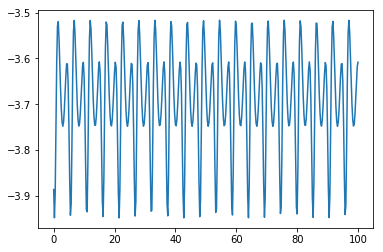

In [78]:
plot(t1, C1)

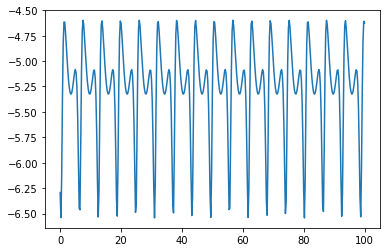

In [79]:
plot(t2,C2)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


Text(0.5, 1.0, 'portrait de phase de euler explicite')

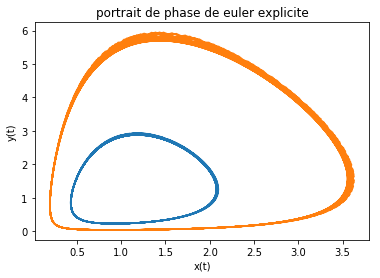

In [80]:
#Question 5, b)

t, x = SCH(100,0.25,x0[0])
t, z = SCH(100,0.25,x0[1])
aa1=[]
aa2=[]
bb1=[]
bb2=[]
for i in range(len(x)):
    aa1.append(x[i][0])     #X[solution de la ième condi initiale][on prend les x]
    aa2.append(x[i][1])
    bb1.append(z[i][0])
    bb2.append(z[i][1])


p1=plot(aa1,aa2)
p2=plot(bb1,bb2)
xlabel("x(t)")
ylabel("y(t)")
title("portrait de phase de euler explicite")